In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import urllib.request

url = 'http://ergast.com/downloads/f1db_csv.zip'
filehandle, _ = urllib.request.urlretrieve(url)
zf = zipfile.ZipFile(filehandle, 'r')

results_df = pd.read_csv(zf.open('results.csv'))
drivers_df = pd.read_csv(zf.open('drivers.csv'))
lap_times_df = pd.read_csv(zf.open('lap_times.csv'))
races_df = pd.read_csv(zf.open('races.csv'))
circuits_df = pd.read_csv(zf.open('circuits.csv'))
constructors_df = pd.read_csv(zf.open('constructors.csv'))
pit_stops_df = pd.read_csv(zf.open('pit_stops.csv'))

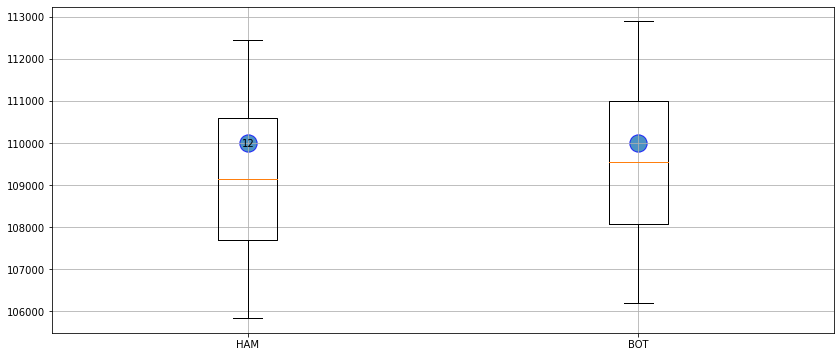

In [4]:
raceId = lap_times_df.raceId.drop_duplicates().iloc[-1]

driverId = drivers_df[drivers_df.code == 'HAM'].driverId.iloc[-1]
race_df = lap_times_df[(lap_times_df.raceId == raceId) & (lap_times_df.driverId == driverId)].copy()
q1 = race_df.milliseconds.quantile(0.25)
q3 = race_df.milliseconds.quantile(0.75)
cons = (q3 - q1) * 1.5
high_lim = q3 + cons
low_lim = q1 - cons
data_1 = [q3, high_lim, low_lim, q1]

driverId = drivers_df[drivers_df.code == 'VER'].driverId.iloc[-1]
race_df = lap_times_df[(lap_times_df.raceId == raceId) & (lap_times_df.driverId == driverId)].copy()
q1 = race_df.milliseconds.quantile(0.25)
q3 = race_df.milliseconds.quantile(0.75)
cons = (q3 - q1) * 1.5
high_lim = q3 + cons
low_lim = q1 - cons
data_2 = [q3, high_lim, low_lim, q1]

plt.figure(figsize=(14, 6))

data = [data_1, data_2]
plt.boxplot(data)
plt.xticks([i + 1 for i in range(len(data))], ('HAM', 'BOT'))
plt.scatter([1,2], [110000,110000], s=300, alpha=0.8, edgecolors='b')
plt.text(1, 110000, '12', horizontalalignment='center', verticalalignment='center')
plt.grid(zorder=0)
plt.show()